Import Required Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
from collections import Counter
import re

Defining The Functions We need

Removing stopwords function 

In [2]:
nltk.download('stopwords')

def remove_stopwords(df):
    stop_words = set(stopwords.words('english'))
    cols_to_remove = [col for col in df.columns if col.lower() in stop_words]
    df = df.drop(columns=cols_to_remove)
    
    return df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owaes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Feature Selection Function

In [3]:
def featureSelect_dataframe(x,y,criteria,k):
    reg = SelectKBest(criteria , k=k).fit(x,y)
    x_transformed = reg.transform(x)
    x = x[[val for i,val in enumerate(x.columns) if reg.get_support()[i]]]
    return x

Load The Dataset

In [4]:
email=pd.read_csv('emails.csv')

The First Five Rows of The Dataset

In [5]:
email.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


Analyze The Dataset

In [6]:
print('\nSize of vector: ', email['Email No.'].shape[0])
print('\nNumber of rows and columns: ',email.shape)
print('\nCount null values in each columns: ')
print(email.isnull().sum())
print('\nTotal number of null values :',email.isnull().sum().sum())
print('\nNumber of duplicate rows :',email.duplicated().sum())
print('\nNumber of duplicate columns: ',email.columns.duplicated().sum())
print('\nDiscription of dataset: ')
print(email.describe())


Size of vector:  5172

Number of rows and columns:  (5172, 3002)

Count null values in each columns: 
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

Total number of null values : 0

Number of duplicate rows : 0

Number of duplicate columns:  0

Discription of dataset: 
               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000

Plotting the count of spam and non-spam emails

Text(0.5, 1.0, 'Number of Spam and non-spam emails')

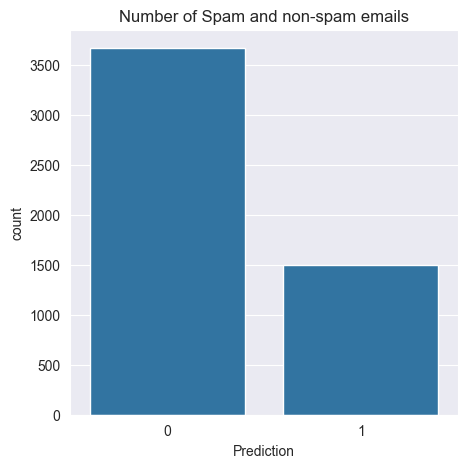

In [7]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.countplot(x='Prediction',data=email)
plt.title('Number of Spam and non-spam emails')

Applying the stopwords function

In [8]:
emails = remove_stopwords(email)

The dataset after removing the stopwords

In [9]:
emails.head()

,Email No.,ect,hou,enron,com,gas,deal,meter,hpl,please,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,24,27,1,3,1,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,22,10,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,17,9,0,0,2,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0


   Dataset Partition

In [10]:
emails.drop(columns='Email No.',inplace=True)
x=emails.drop('Prediction',axis=1)
y=emails['Prediction']

Applying The Feature Selection Function

In [11]:
new_x=featureSelect_dataframe(x,y,f_classif,1400)
new_x

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,fall,fear,hate,debt,reform,plain,valued,lay,military,ff
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,0,0,0,0,0,0,0,0,29,...,0,0,0,0,0,0,0,0,0,0
5168,11,3,1,3,5,0,0,0,1,218,...,0,0,0,0,0,0,0,0,0,1
5169,1,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
5170,1,0,0,4,0,1,0,0,1,45,...,0,0,0,0,0,0,0,0,0,1


Dataset Splitting 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(new_x,y,test_size=0.3,random_state=42)

Dataset Scaling

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Performance Function 

In [14]:
def perform_Train(y_pred):
    print("\nPrecision : ", precision_score(y_train, y_pred))
    print("\nRecall : ", recall_score(y_train, y_pred))
    print("\nAccuracy Score : ", accuracy_score(y_train, y_pred))
    print("\nF1 Score : ", f1_score(y_train, y_pred))
    print("\n", confusion_matrix(y_train, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred), display_labels=['Spam', 'Non-spam'] )
    cm_display.plot()
    plt.show()

Testing Performance Function 

In [15]:
def perform_Test(y_pred):
    print("\nPrecision : ", precision_score(y_test, y_pred))
    print("\nRecall : ", recall_score(y_test, y_pred))
    print("\nAccuracy Score : ", accuracy_score(y_test, y_pred))
    print("\nF1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Non-spam'] )
    cm_display.plot()
    plt.show()

Finding The Best Hyperparameters For KNN

In [79]:
KNN=KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3,10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]}

knn_grid_search = GridSearchCV(KNN, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train, y_train)
print("K-Nearest Neighbors (KNN):")
print("Best Hyperparameters:", knn_grid_search.best_params_)
print("Best Accuracy:", knn_grid_search.best_score_)
print()

K-Nearest Neighbors (KNN):
Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Accuracy: 0.8988950276243093



Building & Training KNN Classifier

In [16]:
KNN=KNeighborsClassifier(n_neighbors = 3, weights='distance', p=2)
KNN=KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

KNN Classifier Training Performance


Precision :  1.0

Recall :  1.0

Accuracy Score :  1.0

F1 Score :  1.0

 [[2575    0]
 [   0 1045]]



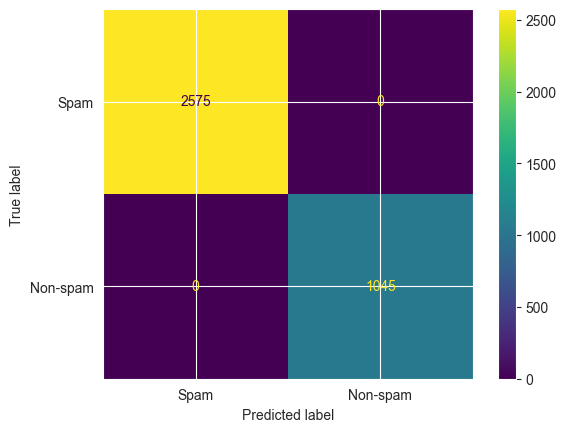

In [17]:
y_pred_train=KNN.predict(x_train)
perform_Train(y_pred_train)

KNN Classifier Testing Performance


Precision :  0.8146718146718147

Recall :  0.9274725274725275

Accuracy Score :  0.916881443298969

F1 Score :  0.8674203494347379

 [[1001   96]
 [  33  422]]



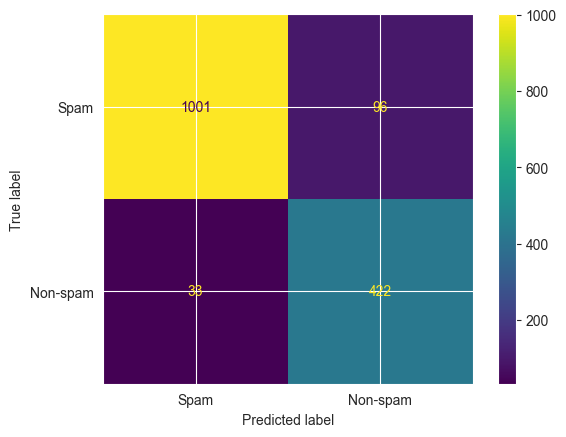

In [18]:
y_pred_test=KNN.predict(x_test)
perform_Test(y_pred_test)

Classification Report

In [19]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1097
           1       0.81      0.93      0.87       455

    accuracy                           0.92      1552
   macro avg       0.89      0.92      0.90      1552
weighted avg       0.92      0.92      0.92      1552



Finding The Best Hyperparameters For Decision Tree

In [20]:
DT=DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion' : ['gini','entropy'],
    'max_features' : [500,700,1000]
}
dt_grid_search = GridSearchCV(DT, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train, y_train)
print("Decision Tree:")
print("Best Hyperparameters:", dt_grid_search.best_params_)
print("Best Accuracy:", dt_grid_search.best_score_)
print()

Decision Tree:
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 700, 'min_samples_split': 5}
Best Accuracy: 0.9259668508287294



Building & Training Decision Tree Classifier

In [21]:
DT=DecisionTreeClassifier(criterion='entropy',max_depth=30, min_samples_split=5,max_features= 1000)
DT=DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features=1000,
                       min_samples_split=5)

Decision Tree classifier Training Performance


Precision :  0.9951830443159922

Recall :  0.9885167464114832

Accuracy Score :  0.9953038674033149

F1 Score :  0.9918386941910706

 [[2570    5]
 [  12 1033]]



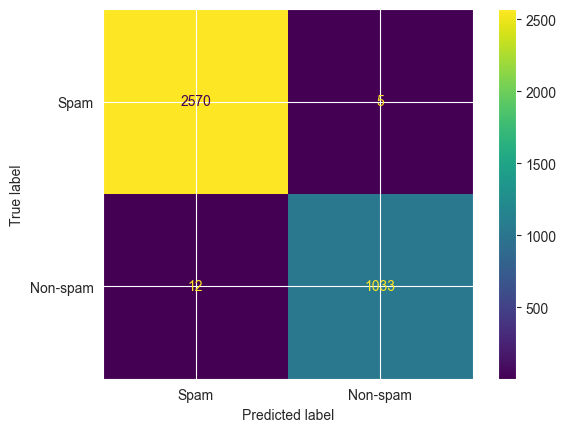

In [22]:
y_pred_train=DT.predict(x_train)
perform_Train(y_pred_train)

Decision Tree classifier Testing Performance


Precision :  0.8923766816143498



Recall :  0.8747252747252747

Accuracy Score :  0.9323453608247423

F1 Score :  0.8834628190899001

 [[1049   48]
 [  57  398]]



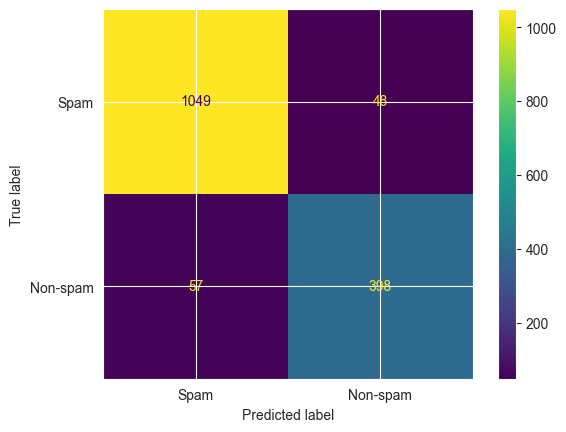

In [23]:
y_pred_test=DT.predict(x_test)
perform_Test(y_pred_test)

Decision Tree Plot

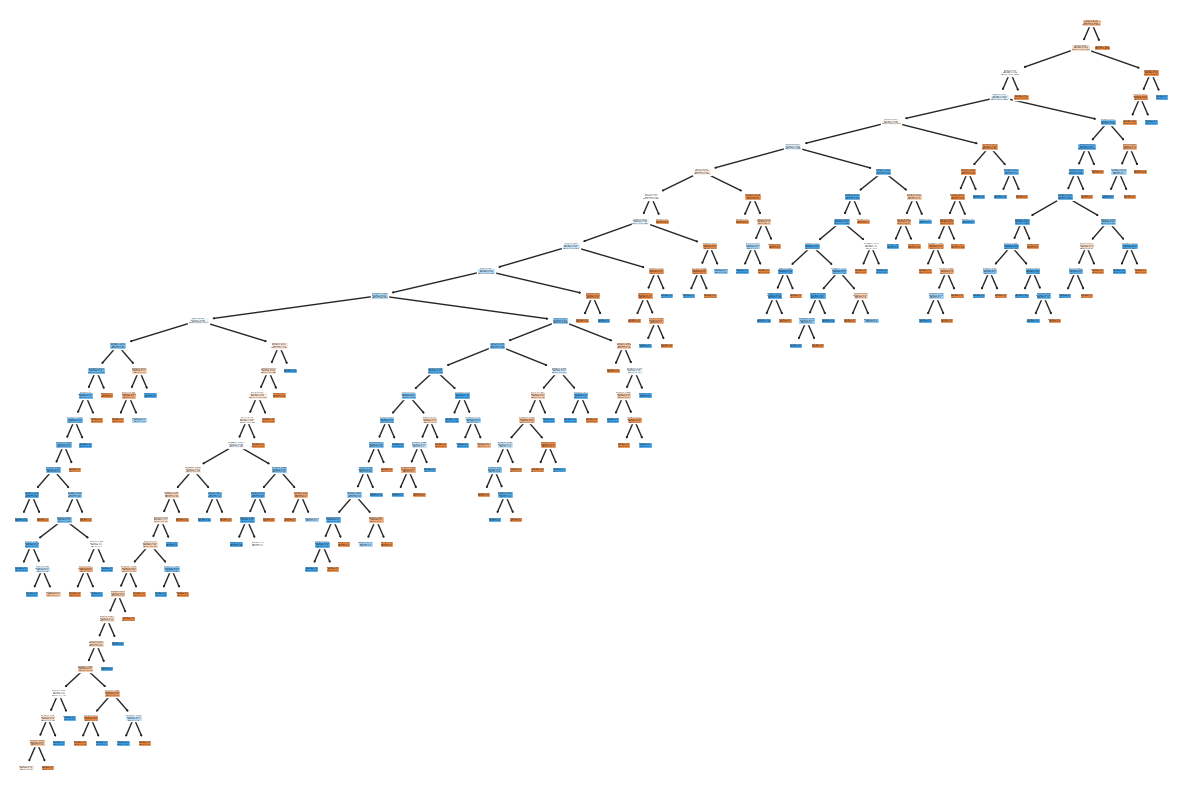

In [24]:
plt.figure(figsize=(15, 10))
plot_tree(DT, filled = True, rounded = False)
plt.show()

Classification Report 

In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1097
           1       0.89      0.87      0.88       455

    accuracy                           0.93      1552
   macro avg       0.92      0.92      0.92      1552
weighted avg       0.93      0.93      0.93      1552



Finding The Best Hyperparameters For Gaussian Naive Bayse

In [90]:
GNB=GaussianNB()
gnb_param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
gnb_grid_search = GridSearchCV(GNB, gnb_param_grid, cv=5, scoring='accuracy')
gnb_grid_search.fit(x_train, y_train)
print("Gaussian Naive Bayes:")
print("Best Hyperparameters:", gnb_grid_search.best_params_)
print("Best Accuracy:", gnb_grid_search.best_score_)
print()

Gaussian Naive Bayes:
Best Hyperparameters: {'var_smoothing': 1.2328467394420635e-09}
Best Accuracy: 0.9267955801104973



Building & Training Gaussian Naive Bayse Classifier

In [26]:
GNB = GaussianNB()
GNB=GNB.fit(x_train, y_train)

GaussianNB()

Gaussian Naive Bayse Training Performance 


Precision :  0.9523809523809523

Recall :  0.861244019138756

Accuracy Score :  0.9475138121546961

F1 Score :  0.9045226130653267

 [[2530   45]
 [ 145  900]]



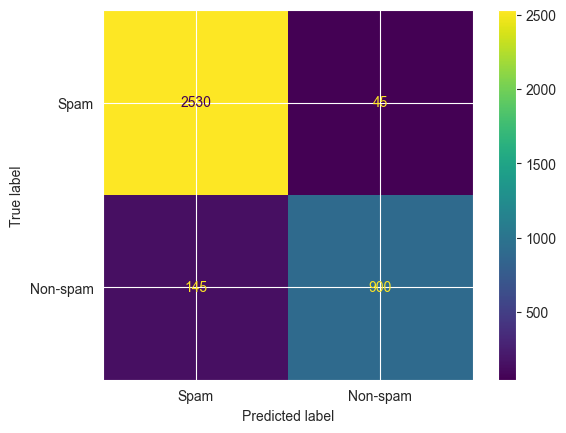

In [27]:
y_pred_train=GNB.predict(x_train)
perform_Train(y_pred_train)

Gaussian Naive Bayse Testing Performance 


Precision :  0.931924882629108

Recall :  0.8725274725274725

Accuracy Score :  0.9439432989690721

F1 Score :  0.9012485811577753

 [[1068   29]
 [  58  397]]



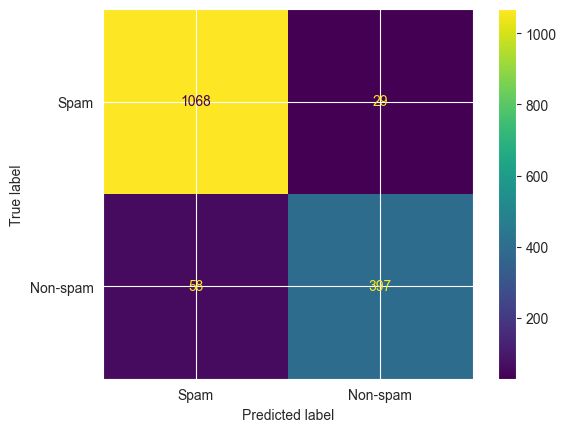

In [28]:
y_pred_test=GNB.predict(x_test)
perform_Test(y_pred_test)

Classification Report

In [29]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1097
           1       0.93      0.87      0.90       455

    accuracy                           0.94      1552
   macro avg       0.94      0.92      0.93      1552
weighted avg       0.94      0.94      0.94      1552



Models Accuracy Comparison 

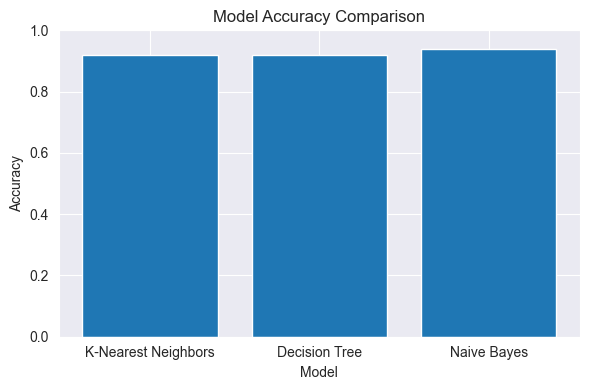

In [30]:
accuracies = {
    'K-Nearest Neighbors': 0.92,
    'Decision Tree': 0.92,
    'Naive Bayes': 0.94,
}
plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Models Performance Comparison 

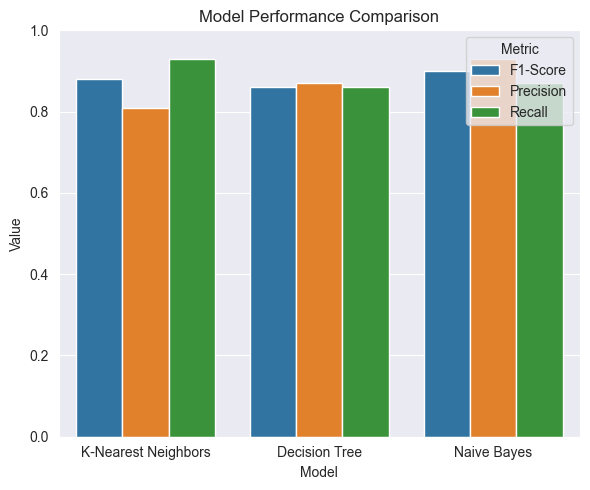

In [31]:
data = {
    'Model': ['K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors',
              'Decision Tree', 'Decision Tree', 'Decision Tree',
              'Naive Bayes', 'Naive Bayes', 'Naive Bayes'
              ],
    'Metric': ['F1-Score', 'Precision', 'Recall',
               'F1-Score', 'Precision', 'Recall',
               'F1-Score', 'Precision', 'Recall'
               ],
    'Value': [0.88, 0.81, 0.93,  # Values for K-Nearest Neighbors
               0.86, 0.87, 0.86,  # Values for Decision Tree
              0.90, 0.93, 0.87,  # Values for Naive Bayes
             ]  
}
df = pd.DataFrame(data)
plt.figure(figsize=(6, 5))
sns.barplot(x='Model', y='Value', hue='Metric', data=df)
plt.title('Model Performance Comparison')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Creating a list contains new spam and non-spam emails

In [447]:
new_emails = [
     # Spam Email:
     "Congratulations! You've won a free vacation to the Bahamas! Click here to claim your prize now.",
     # Spam Email:
     "Urgent: Limited time offer! Get 50 percent off on all purchases today only. Don't miss out!",
     # non-spam email:
     "Hi John, just wanted to follow up on our meeting yesterday. Attached is the agenda for next week's conference. Let me know if you have any questions.",
     # non-spam email:
     "Dear Customer, thank you for your recent purchase. Your order has been successfully processed and will be shipped within 1-2 business days. We appreciate your business.",
     # Spam Email:
     "Dear Valued Customer, You've been selected to receive exclusive offers and amazing deals from our partners! Don't miss out on this limited-time opportunity to save big on a wide range of products and services. Act now and take advantage of our unbeatable discounts on electronics, fashion, travel packages, and much more. Whether you're shopping for yourself or looking for the perfect gift, we've got something for everyone. Hurry, these offers won't last long! Click the link below to start saving today. Best Regards, The Marketing Team",
     # non-spam email:
     "Dear Jonathan, We're excited to invite you to our Annual Conference, where industry leaders and experts gather to share insights, discuss trends, and network with peers. This year's conference will feature keynote speakers, panel discussions, and interactive workshops covering a wide range of topics in Machine Learning. Join us for an enriching experience and the opportunity to connect with like-minded professionals. Register now to secure your spot! We look forward to seeing you at the conference.Best Regards.",
     # Spam Email:
     "Congratulations James! You've won a fabulous prize in our latest sweepstakes! Claim your prize now by clicking the link below and following the instructions. But hurry, you only have 24 hours to claim your winnings before they expire. Don't miss out on this incredible opportunity to win big. Act fast and secure your prize today! Best Regards, The Prize Claim Team",
     # non-spam emails:
     "Dear Subscriber, Welcome to the April edition of our monthly newsletter! In this issue, we're excited to share the latest updates, news, and upcoming events with you. Here's a glimpse of what you'll find inside: Feature Article: 'Exploring the Benefits of Sustainable Practices' Employee Spotlight: Meet Our Team Member of the Month Upcoming Events: Save the Date for Our Annual Charity Gala Product Spotlight: Introducing Our New Spring Collection We hope you enjoy reading our newsletter and find it informative and engaging. As always, your feedback is important to us, so please don't hesitate to reach out with any comments or suggestions. Happy reading! Best Regards, The Newsletter Team",
     # Spam email:
     "Congratulations! You've won a free vacation! Click here to claim your prize!",
     # Spam email:
     "Urgent: Your account has been compromised. Please reset your password immediately.",
     # Spam email:
     "Get rich quick! Invest in this amazing opportunity and watch your money grow.",
     # Spam email:
     "Limited time offer: Buy one, get one free on all products. Don't miss out!",
     # Spam email:
     "You've been selected for a special discount on our exclusive products. Act now!",
     # Non-spam email:
     "Hello, I hope you're having a great day! Just wanted to check in and see how you're doing.",
     # Non-spam email:
     "Reminder: Your appointment with Dr. Smith is tomorrow at 2:00 PM.",
     # Non-spam email:
     "Here's the report you requested. Let me know if you need any further assistance.",
     # Non-spam emails:
     "Congratulations on your recent promotion! We're excited to see what you'll accomplish in your new role",
     # non-spam email:
     "Thank you for your order. Your package has been shipped and should arrive within 3-5 business days",
     # Spam email:
     "Your Amazon account has been locked. Click here to verify your information.",
     # Non-spam email:
     "Thank you for your recent purchase. Here is your order confirmation.",
     # Non-spam email:
     "Happy birthday! We hope you have a fantastic day celebrating with friends and family.",
     # Spam email:
     "You've been selected for a free trial of our premium subscription service. Sign up now!",
     # Non-spam email:
     "Meeting reminder: Our weekly team meeting is scheduled for tomorrow at 10:00 AM.",
     # Spam Email:
     "Increase your website traffic overnight with our guaranteed SEO services.",
     # Non-spam email:
     "Thank you for your donation. Your contribution will make a difference in our community.",
     # Spam email:
     "Urgent: Your PayPal account has been suspended. Please verify your identity.",
     #Non-spam email:
     "Reminder: Your quarterly performance review is scheduled for next week.",
     #spam email:
     "You've been selected as a winner in our weekly prize draw. Claim your reward now!",
     #non-spam email:
     "Invitation: Join us for a webinar on leadership skills development.",
     #spam email:
     "Limited-time offer: Buy one, get one free on all beauty products.",
     # non-spam email:
     "Your tax return has been processed. You can expect your refund within the next 10 business days.",
     #spam email:
     "Act fast! Our exclusive sale ends tonight. Shop now for the best deals.",
     #non-spam email:
     "Congratulations on completing your online course. Here's your certificate of completion.",
     #spam email:
     "Congratulations! You've been selected as the lucky winner of our grand prize giveaway! You've won a luxury vacation package to an exotic destination of your choice, complete with first-class accommodations and exciting activities. To claim your prize, simply click the link below and provide your contact information. Don't miss out on this incredible opportunity!",
     #spam email:
     "Attention: Your account security has been compromised, and unauthorized access has been detected. For your protection, we have temporarily suspended your account. To regain access and secure your account, please follow the instructions provided in the attached document. Failure to take immediate action may result in permanent account suspension. Act now to prevent further unauthorized activity.",
     #non-spam email:
     "Good morning! I hope this email finds you well. I wanted to reach out and express my gratitude for your hard work and dedication to our team. Your contributions have been invaluable, and I truly appreciate all that you do. Please don't hesitate to reach out if you need any support or assistance. Together, we can continue to achieve great things.",
     #non-spam email:
     "Invitation: You're cordially invited to attend our annual charity gala in support of local organizations. Join us for an evening of elegance and philanthropy as we come together to make a positive impact on our community. Your presence and generosity will help us raise vital funds for important causes. RSVP today to reserve your seat at this memorable event.",
     #spam email:
     "Limited-time offer: Experience the power of our revolutionary weight loss supplement and achieve your dream body in just weeks! Our scientifically-proven formula is designed to boost metabolism, suppress appetite, and burn fat effectively. Thousands of satisfied customers have already transformed their lives with our product. Order now and take the first step towards a healthier, happier you!",
     #non-spam email:
     "Update: We're excited to announce the launch of our new product line! Our latest collection features innovative designs and premium quality materials, perfect for the modern consumer. Whether you're looking for stylish apparel, cutting-edge gadgets, or luxurious home decor, we've got something for everyone. Explore our website to discover the latest trends and must-have items."
     
     #spam emails:

     "Exclusive offer for valued customers like you! Unlock access to our VIP membership program and enjoy exclusive benefits, including early access to sales, special discounts, and personalized offers tailored to your preferences. Upgrade now to elevate your shopping experience and save on your favorite products. Limited slots available, so act fast!",

     "Important notice: Your subscription to our premium service is set to expire soon. Don't miss out on uninterrupted access to exclusive content, advanced features, and premium support. Renew your subscription today to continue enjoying all the benefits of our service. We value your continued patronage and look forward to serving you for years to come.",
      
     "Discover the secret to financial freedom with our proven investment strategy. Our expert advisors will guide you through the process of building a diversified portfolio, maximizing returns, and achieving your long-term financial goals. Say goodbye to financial stress and hello to a brighter future. Start your journey to wealth today with our comprehensive investment program.",

     "Attention: Your account security is our top priority. We've detected suspicious activity on your account and have temporarily restricted access to prevent unauthorized access. To verify your identity and restore access, please follow the instructions provided in the attached document. Your prompt action is crucial to ensure the security of your account. Thank you for your cooperation.",

     "Limited-time offer: Don't miss out on our biggest sale of the year! Enjoy massive discounts on a wide range of products, including electronics, fashion, home decor, and more. Plus, take advantage of exclusive deals and flash sales throughout the event. Shop now and save big on your favorite brands. Hurry, offers valid while supplies last!",

     "Congratulations! You've been selected as the winner of our monthly sweepstakes. As the lucky winner, you'll receive a generous cash prize and a luxury vacation package for two. To claim your prizes, simply click the link below and follow the instructions provided. Don't wait, claim your winnings now and start planning your dream getaway!",

     "Urgent notification: Your account has been flagged for suspicious activity. To avoid permanent suspension, please verify your identity by clicking the link below and following the instructions. Failure to comply may result in the termination of your account. Protect your personal information and act now to secure your account.",

     "Special offer for loyal customers: As a valued member of our community, we're offering you exclusive access to our premium subscription service at a discounted rate. Enjoy ad-free browsing, unlimited downloads, and VIP customer support. Upgrade now to unlock premium features and enhance your user experience. Limited-time offer, so don't miss out!",

     "Attention: You've won a free gift card worth $500! Claim your prize by completing a short survey and providing your contact information. Once verified, your gift card will be delivered to your email inbox within 24 hours. Celebrate your win and treat yourself to a shopping spree on us. Congratulations!",

     #non-spam emails:

     "Warm greetings! As we approach the end of another successful quarter, I wanted to take a moment to express my gratitude for your dedication and hard work. Your commitment to excellence has been instrumental in our team's achievements, and I'm proud to have you as part of our organization. Let's continue to strive for greatness and make a positive impact together.",

     "Invitation: You're invited to join us for a virtual networking event designed to connect professionals from various industries. Expand your network, exchange ideas, and explore potential collaborations with like-minded individuals. Whether you're a seasoned professional or just starting out in your career, this event offers valuable opportunities for growth and development. RSVP today to reserve your spot!",

     "Update: We're excited to announce the launch of our new customer loyalty program! Earn rewards points for every purchase and redeem them for exclusive discounts, freebies, and special perks. Plus, enjoy members-only offers and early access to new products and promotions. Sign up now to start earning rewards and unlock VIP benefits. Thank you for your continued support!",

     "Good day! I wanted to express my appreciation for your ongoing support and collaboration. Your dedication to our shared goals and values has been instrumental in our success, and I'm grateful to have you as part of our team. Together, we've achieved significant milestones, and I look forward to many more accomplishments in the future. Thank you for your hard work and commitment.",

     "Invitation: You're invited to attend our annual charity fundraiser in support of local communities. Join us for an evening of philanthropy, entertainment, and goodwill as we come together to make a positive impact. Your presence and generosity will help us raise essential funds for important causes. RSVP today to secure your spot at this meaningful event.",

     "Update: We're excited to announce the launch of our new online learning platform! Access a wide range of courses and resources designed to enhance your skills and knowledge. Whether you're interested in professional development, personal growth, or lifelong learning, our platform has something for everyone. Enroll today and take the first step towards achieving your goals.",

     "Warm greetings from our team! We wanted to take a moment to express our gratitude for your continued support and loyalty. Your satisfaction is our top priority, and we're committed to delivering exceptional products and service. Thank you for choosing us as your trusted partner, and we look forward to serving you for years to come.",

     "Invitation: Join us for a virtual seminar on industry trends and best practices. Gain valuable insights from industry experts, network with peers, and learn strategies to drive business growth. Whether you're a seasoned professional or new to the industry, this event offers valuable opportunities for learning and professional development. Register now to secure your spot!",

     "Update: We're excited to announce the launch of our new mobile app! Access our services on the go, stay connected with updates and notifications, and enjoy a seamless user experience. Download the app today and experience the convenience of managing your account from anywhere. Your feedback is important to us, so feel free to share your thoughts and suggestions.",

     #spam emails:

     "We have detected unusual activity on your account and suspect that it may have been compromised. To ensure the safety of your personal information and prevent any unauthorized access, we urge you to take immediate action. Please click on the link below to verify your identity and reset your password. Ignoring this message may result in the suspension of your account. Your prompt attention to this matter is greatly appreciated.",

     "Congratulations! You've been selected as a potential winner of our exclusive prize giveaway. As a valued customer, you have the chance to win amazing prizes, including cash rewards, luxury vacations, and the latest tech gadgets. To claim your prize, simply click on the link below and follow the instructions. Hurry, this offer won't last long. Don't miss out on your chance to win big!",

     "We're excited to announce our biggest sale of the year! For a limited time only, you can enjoy massive discounts on our entire range of products. From fashion to electronics, home goods to beauty essentials, everything is now 50 percent off. Plus, get free shipping on all orders over $50. Don't miss out on this incredible opportunity to save big. Shop now and stock up on your favorite items!",

     "We take the security of your account seriously, which is why we're reaching out to you with this urgent update. Our security systems have detected suspicious activity on your account, and we need your help to verify your identity and secure your account. Please log in to your account and follow the prompts to complete the verification process. If you have any questions or concerns, please don't hesitate to contact our support team. Thank you for your cooperation.",

     "Congratulations! You've been chosen as the lucky winner of our monthly prize draw. As a token of our appreciation, we're offering you the opportunity to claim your prize today. Simply click on the link below and follow the instructions to redeem your reward. But hurry, this offer is only available for a limited time. Don't miss out on your chance to win big!",

     "We have a special treat for you! As a valued customer, we're offering you an exclusive discount on your next purchase. For a limited time, you can save 70 percent on any item in our store. Whether you're shopping for yourself or looking for the perfect gift, now is the perfect time to save big. Simply enter the code SAVE70 at checkout to redeem your discount. Shop now and take advantage of this incredible offer!",

     #non-spam emails:

     "We hope this email finds you well. We're excited to share our latest news and updates with you in our monthly newsletter. In this edition, you'll find insightful articles, helpful tips, and important announcements about our products and services. We value your feedback, so please feel free to reach out to us with any questions or comments. Thank you for being a part of our community, and we look forward to staying connected with you!",

     "We're thrilled to invite you to join us at our upcoming annual conference. This year's event promises to be our biggest and most exciting yet, with engaging keynote speakers, interactive workshops, and networking opportunities with industry leaders. Whether you're a seasoned professional or just starting out in your career, there's something for everyone at our conference. Register now to secure your spot and take your skills to the next level!",

     "We're pleased to announce the release of several new features on our platform that we think you'll love. From enhanced security measures to improved user interface design, these updates are designed to make your experience with our platform even better. We're constantly striving to provide you with the best possible service, and we appreciate your continued support and feedback. Check out the latest updates today and let us know what you think!",

     "We wanted to take a moment to express our gratitude for your recent purchase with us. We appreciate your business and are delighted that you chose to shop with us. Your satisfaction is our top priority, and we're committed to providing you with high-quality products and excellent customer service. If you have any questions or concerns about your purchase, please don't hesitate to contact us. Thank you again for your support, and we look forward to serving you again soon!",

     "As a valued customer, we're excited to invite you to join our exclusive loyalty program. Membership comes with a range of benefits, including special discounts, early access to sales events, and personalized offers tailored to your preferences. Plus, earn points for every purchase and redeem them for rewards such as gift cards, free products, and more. Joining is free and easy simply click the link below to sign up and start enjoying the perks today!",

     "Just a friendly reminder that our annual sale is still underway, but time is running out to take advantage of these incredible deals. From now, you can save big on a wide range of products. Whether you're shopping for yourself or getting a head start on your holiday shopping, now is the perfect time to save. Don't miss out shop now before it's too late!",

     #spam emails:

     "I am writing to you with an urgent business proposal that presents an extraordinary opportunity for financial gain. My client, a wealthy individual from a foreign country, has entrusted me with a substantial sum of money to invest in a lucrative venture. However, due to legal restrictions in their country, they require a trusted partner like yourself to assist with the transfer of funds. If you are interested in this opportunity, please reply to this email immediately for further details.",

     "Congratulations! You have been selected to receive an exclusive offer available for a limited time only. As a valued recipient of this email, you have the opportunity to claim a special discount on a wide range of products and services. Act fast to take advantage of this incredible deal before it's too late. Don't miss out on this chance to save big click the link below to redeem your offer now!",

     "Attention Winner, We are pleased to inform you that you have been selected as the lucky winner of our latest prize giveaway. You have won an exciting prize! To claim your reward, simply follow the instructions provided in this email. But hurry you must claim your prize within 10 days to ensure you don't miss out on this fantastic opportunity. Congratulations once again on your win!",

     "Are you tired of working hard for minimal returns? It's time to take control of your financial future with our revolutionary investment opportunity. Our program offers the chance to earn passive income from the comfort of your own home. With minimal effort required, you can start generating consistent returns on your investment in no time. Don't miss out on this opportunity to achieve financial freedom sign up today and start earning!",

     "I hope this email finds you well. I am reaching out to you with an urgent request for assistance. Due to unforeseen circumstances, I find myself in need of help to transfer a large sum of money out of my country. If you are willing to lend a hand, I am prepared to offer you a generous reward for your assistance. Please reply to this email as soon as possible if you are interested in helping me with this matter.",

     "Have you ever dreamed of being your own boss? Now is your chance to turn that dream into reality with our incredible business opportunity. Our proven system allows you to start your own business with minimal investment and maximum potential for success. Say goodbye to the 9-to-5 grind and hello to financial independence and flexibility. Don't let this opportunity pass you by seize the moment and take control of your future today!",

     "You're invited to join our exclusive VIP club and unlock a world of benefits and privileges. As a VIP member, you'll enjoy access to special discounts, VIP-only events, and exclusive offers reserved just for you. Plus, earn rewards points on every purchase and redeem them for exciting rewards such as gift cards, travel vouchers, and more. Don't miss out on this opportunity to elevate your shopping experience join our VIP club today!",

     "Attention Account Holder, We recently detected unusual activity on your account and suspect that it may have been compromised. For your security and protection, we have temporarily suspended access to your account. To regain access and secure your account, please follow the instructions provided in this email. We take the security of your account seriously and apologize for any inconvenience this may cause. Thank you for your prompt attention to this matter.",

     "Dear Valued Customer, We have received reports of suspicious activity on your account and need to verify your account information to ensure its security. Please click the link below to verify your identity and update your account information as soon as possible. Failure to do so may result in the suspension or termination of your account. Thank you for your cooperation in helping us maintain the integrity of our services.",

     "Don't miss out on our limited-time offer act now and save big on your next purchase! Whether you're shopping for electronics, fashion, home goods, or more, we've got you covered with unbeatable deals and discounts. But hurry this offer won't last long, so don't delay! Click the link below to shop now and start saving today!",

     #non-spam emails:

     "Dear Subscriber, Welcome to the April edition of our monthly newsletter! In this issue, we're excited to share with you the latest updates, news, and events from our organization. From upcoming product launches to industry insights and expert tips, there's something for everyone in this month's newsletter. Sit back, relax, and enjoy reading!",

     "Dear Team, You're invited to attend our upcoming company town hall meeting, where we'll be discussing important updates, initiatives, and goals for the upcoming quarter. This is an opportunity for us to come together as a team, share ideas, and align on our collective vision for the future. Your participation and input are invaluable, so we hope to see you there!",

     "Dear Employee, This is a friendly reminder that open enrollment for employee benefits is currently underway. Don't miss your chance to review and select the benefits that best meet your needs and those of your family. From healthcare options to retirement plans and beyond, we're here to support you every step of the way. Act now to ensure you're making the most of your benefits!",

     "Attention All Employees, Mark your calendars for our upcoming company picnic, scheduled. Join us for a day of fun, food, and camaraderie as we celebrate another successful year together. Bring your family and friends for an afternoon of games, activities, and delicious barbecue. We can't wait to see you there!",

     "Dear Team Member, As part of our ongoing commitment to employee development and growth, we are conducting quarterly performance reviews for all team members. Your feedback is invaluable in helping us assess your performance, identify areas for improvement, and set goals for the future. Please take a few moments to complete the self-assessment questionnaire linked below. Your input is greatly appreciated.",

     "We're excited to announce an upcoming volunteer opportunity for employees interested in giving back to the community. Join us for a community cleanup event, where we'll be working together to beautify our local area. Whether you're passionate about environmental conservation or simply want to make a positive impact, we'd love to have you on board. Sign up today to reserve your spot!",

     "Dear Team, On behalf of the company, we would like to express our heartfelt appreciation for your hard work, dedication, and contributions to our organization. As Employee Appreciation Day approaches, we want to take this opportunity to say thank you for everything you do. Your efforts do not go unnoticed, and we are truly grateful to have such a talented and committed team. Here's to another year of success together!",

     "Attention All Employees, Due to unforeseen circumstances, we regret to inform you that our office will be temporarily closed on Sunday for maintenance and repairs. We apologize for any inconvenience this may cause and appreciate your understanding. Rest assured, we are working diligently to minimize disruption and ensure a smooth transition during this time. Please refer to the email sent earlier for further details and updates.",

     "Welcome aboard! We're thrilled to have you join our team at the company. As you embark on this exciting journey with us, we want to extend a warm welcome and provide you with all the resources and support you need to succeed. From orientation sessions to mentorship programs and beyond, we're here to help you acclimate to your new role and hit the ground running. Once again, welcome to the team!",

     "Dear Colleagues, Get ready to recharge, reconnect, and rejuvenate at our upcoming annual company retreat! Mark your calendars for monday as we embark on a memorable getaway filled with team-building activities, workshops, and networking opportunities. This is your chance to unwind, bond with colleagues, and return refreshed and inspired to tackle new challenges. Stay tuned for more details and registration information!",

     "Dear Team, We are pleased to announce that performance bonuses for the this year have been processed and will be distributed to eligible employees this week. Your hard work and dedication have not gone unnoticed, and we are grateful for your contributions to our continued success. Please check your email for further details on bonus amounts and distribution dates. Congratulations to all recipients!",

     "Attention All Employees, Enhance your skills, expand your knowledge, and advance your career with our comprehensive employee training program. Registration is now open for a variety of courses covering topics such as leadership development, technical skills, and personal growth. Whether you're looking to sharpen your expertise in a specific area or explore new opportunities for growth, we have something for everyone. Don't miss out sign up today!",

     "Dear Team Member, As part of our ongoing commitment to fostering a diverse and inclusive workplace, we invite you to participate in an anonymous employee survey to gather feedback on our diversity and inclusion initiatives. Your input will help us identify areas for improvement and develop strategies to create a more equitable and inclusive environment for all employees. Thank you for your participation and support.",

     "Dear Team, Are you ready to prioritize your health and wellbeing? Join us for our upcoming wellness challenge, where we'll be encouraging each other to make positive lifestyle changes and adopt healthy habits. From daily exercise routines to mindfulness practices and nutritional tips, we'll be supporting each other every step of the way. Let's make health a priority together sign up for the challenge today!",

     "Dear Team, Do you know a colleague who goes above and beyond in their role? Nominate them for our employee recognition program and give them the recognition they deserve! Whether it's their exceptional work ethic, outstanding performance, or positive attitude, we want to celebrate their contributions to our team. Take a moment to recognize your colleagues and show your appreciation for their hard work.",

     "Dear Colleagues, We're excited to share with you the latest updates on our corporate social responsibility initiatives, with a focus on environmental sustainability. From reducing our carbon footprint to implementing eco-friendly practices in our operations, we're committed to making a positive impact on the planet. Join us in our efforts to create a more sustainable future for generations to come.",

     "Dear Team, We're pleased to announce the introduction of a new policy on flexible work arrangements, designed to support a healthy work-life balance for our employees. Under this policy, eligible employees will have the opportunity to request flexible work schedules, remote work options, and other accommodations to better meet their individual needs. We believe that offering flexibility is key to fostering a positive and productive work environment for all.",

     "Attention All Employees, Unlock your potential and invest in your professional growth with our upcoming employee workshop series. From communication skills to project management and beyond, these interactive workshops are designed to help you develop new skills, expand your knowledge, and advance your career. Don't miss out on this valuable opportunity to invest in yourself and take your career to the next level.",

     "Dear Team, We're excited to announce our upcoming employee volunteer day, where we'll be giving back to the community and making a positive impact together. Join us as we volunteer with local organizations, support important causes, and lend a helping hand to those in need. Whether you're passionate about environmental conservation, social justice, or community outreach, there's something for everyone to get involved in. Sign up today to join us on this meaningful journey!",

     "Dear Staff, You're invited to our annual staff appreciation luncheon, where we'll be celebrating your hard work, dedication, and contributions to our organization. Join us for a delicious meal, fun activities, and special surprises as we express our gratitude for everything you do. This is our way of saying thank you for your continued commitment to excellence. We look forward to celebrating with you!",

     "Dear Team Members, Get ready to strengthen bonds, build relationships, and have fun at our upcoming team building retreat! Registration is now open for this exciting event, where we'll be engaging in a variety of team-building activities, workshops, and adventures. This is your chance to connect with colleagues, foster collaboration, and create memories that will last a lifetime. Don't miss out sign up today!",

     "Dear Team, We want to hear from you! Take a few moments to complete our anonymous employee survey and share your feedback on various aspects of our organization. Your input is invaluable in helping us understand your needs, address any concerns, and make improvements to enhance the employee experience. Thank you for your participation and for helping us create a better workplace for everyone."
     
]

Counting Words Frequencies in Each Email

In [448]:
def count_word_frequency(emails):
    word_frequencies = {}
    word_pattern = re.compile(r'\b\w+\b')
    for i, email in enumerate(emails, 1):
        email_tokens = word_pattern.findall(email.lower())
        word_counts = Counter(email_tokens)
        word_frequencies[f"Email {i}"] = word_counts
    return word_frequencies

word_frequencies = count_word_frequency(new_emails)

for email_num, frequencies in word_frequencies.items():
    print(f" {email_num}: {frequencies}")

 Email 1: Counter({'to': 2, 'congratulations': 1, 'you': 1, 've': 1, 'won': 1, 'a': 1, 'free': 1, 'vacation': 1, 'the': 1, 'bahamas': 1, 'click': 1, 'here': 1, 'claim': 1, 'your': 1, 'prize': 1, 'now': 1})
 Email 2: Counter({'urgent': 1, 'limited': 1, 'time': 1, 'offer': 1, 'get': 1, '50': 1, 'percent': 1, 'off': 1, 'on': 1, 'all': 1, 'purchases': 1, 'today': 1, 'only': 1, 'don': 1, 't': 1, 'miss': 1, 'out': 1})
 Email 3: Counter({'hi': 1, 'john': 1, 'just': 1, 'wanted': 1, 'to': 1, 'follow': 1, 'up': 1, 'on': 1, 'our': 1, 'meeting': 1, 'yesterday': 1, 'attached': 1, 'is': 1, 'the': 1, 'agenda': 1, 'for': 1, 'next': 1, 'week': 1, 's': 1, 'conference': 1, 'let': 1, 'me': 1, 'know': 1, 'if': 1, 'you': 1, 'have': 1, 'any': 1, 'questions': 1})
 Email 4: Counter({'your': 3, 'business': 2, 'dear': 1, 'customer': 1, 'thank': 1, 'you': 1, 'for': 1, 'recent': 1, 'purchase': 1, 'order': 1, 'has': 1, 'been': 1, 'successfully': 1, 'processed': 1, 'and': 1, 'will': 1, 'be': 1, 'shipped': 1, 'within

Converting The list Into a Dataframe

In [449]:
new_emails_df = pd.DataFrame.from_dict(word_frequencies, orient='index').fillna(0)
new_emails_df = new_emails_df.reindex(sorted(new_emails_df.columns), axis=1)
new_emails_df.reset_index(drop=True, inplace=True)
new_emails_df.head()

,00,1,10,2,24,3,5,50,500,70,...,worth,would,writing,year,years,yesterday,yet,you,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


Adding a Label Column to The Dataframe

In [450]:
label_list = [1,1,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
new_emails_df['Label'] = label_list
new_emails_df.head()

,00,1,10,2,24,3,5,50,500,70,...,would,writing,year,years,yesterday,yet,you,your,yourself,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1


Analyze The New Dataframe

In [451]:
print('\nNumber of rows and columns: ',new_emails_df.shape)
print('\nCount null values in each columns: ')
print(new_emails_df.isnull().sum())
print('\nTotal number of null values :',new_emails_df.isnull().sum().sum())
print('\nNumber of duplicate rows :',new_emails_df.duplicated().sum())
print('\nNumber of duplicate columns: ',new_emails_df.columns.duplicated().sum())
print('\nDiscription of dataset: ')
print(new_emails_df.describe())


Number of rows and columns:  (100, 1080)

Count null values in each columns: 
00          0
1           0
10          0
2           0
24          0
           ..
yet         0
you         0
your        0
yourself    0
Label       0
Length: 1080, dtype: int64

Total number of null values : 0

Number of duplicate rows : 0

Number of duplicate columns:  0

Discription of dataset: 
               00       1          10           2          24       3  \
count  100.000000  100.00  100.000000  100.000000  100.000000  100.00   
mean     0.020000    0.01    0.030000    0.020000    0.020000    0.01   
std      0.140705    0.10    0.171447    0.140705    0.140705    0.10   
min      0.000000    0.00    0.000000    0.000000    0.000000    0.00   
25%      0.000000    0.00    0.000000    0.000000    0.000000    0.00   
50%      0.000000    0.00    0.000000    0.000000    0.000000    0.00   
75%      0.000000    0.00    0.000000    0.000000    0.000000    0.00   
max      1.000000    1.00    1.000

Ploting the Count of Spam and Non-spam Emails of the new dataframe

Text(0.5, 1.0, 'Number of Spam and non-spam emails')

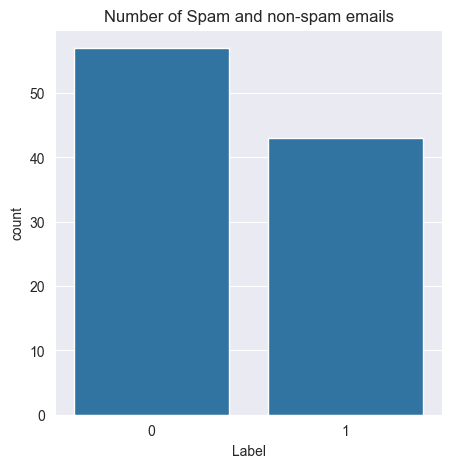

In [452]:
plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.countplot(x='Label',data=new_emails_df)
plt.title('Number of Spam and non-spam emails')

Applying the Stopwords Function To the New Dataframe

In [453]:
new_emails_df = remove_stopwords(new_emails_df)
new_emails_df.head()

,00,1,10,2,24,3,5,50,500,70,...,workshops,world,worth,would,writing,year,years,yesterday,yet,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Removing the Digit Columns from the Dataframe

In [454]:
columns_to_keep = [col for col in new_emails_df.columns if not col.isdigit()]
new_emails_df = new_emails_df[columns_to_keep]
new_emails_df.head()

,aboard,access,acclimate,accommodations,accomplish,accomplishments,account,achieve,achieved,achievements,...,workshops,world,worth,would,writing,year,years,yesterday,yet,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


New Dataframe Partition

In [456]:
X=new_emails_df.drop('Label',axis=1)
Y=new_emails_df['Label']

Applying the Feature Selection Function to the New Dataframe

In [529]:
new_X=featureSelect_dataframe(X,Y,f_classif,665)
new_X.head()

,aboard,access,acclimate,accommodations,accomplishments,account,achieve,achieved,achieving,activities,...,winner,winnings,workshop,workshops,world,worth,would,writing,yesterday,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


New Dataframe Splitting

In [530]:
X_train,X_test,Y_train,Y_test=train_test_split(new_X,Y,test_size=0.3,random_state=42)

New Dataframe Scaling

In [531]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Performance Function

In [532]:
def perform_Test(y_pred):
    print("\nPrecision : ", precision_score(Y_test, y_pred))
    print("\nRecall : ", recall_score(Y_test, y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test, y_pred))
    print("\nF1 Score : ", f1_score(Y_test, y_pred))
    print("\n", confusion_matrix(Y_test, y_pred))
    print("")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, y_pred), display_labels=['Spam', 'Non-spam'] )
    cm_display.plot()
    plt.show()

Bulding and Training a new Gaussian Naive Bayse Model

In [539]:
gnb = GaussianNB()
gnb=gnb.fit(X_train, Y_train)

GaussianNB()


Precision :  0.8235294117647058

Recall :  0.7368421052631579

Accuracy Score :  0.7333333333333333

F1 Score :  0.7777777777777778

 [[ 8  3]
 [ 5 14]]



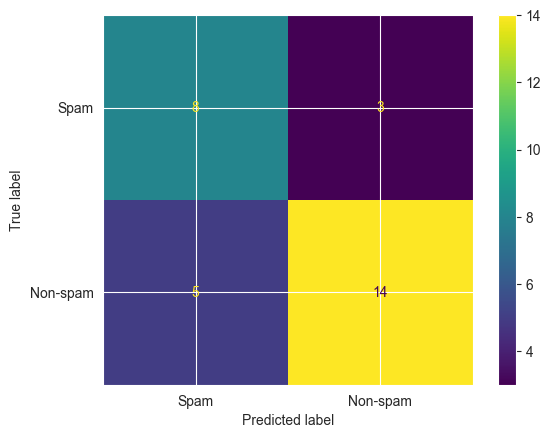

In [540]:
Y_pred_test=gnb.predict(X_test)
perform_Test(Y_pred_test)

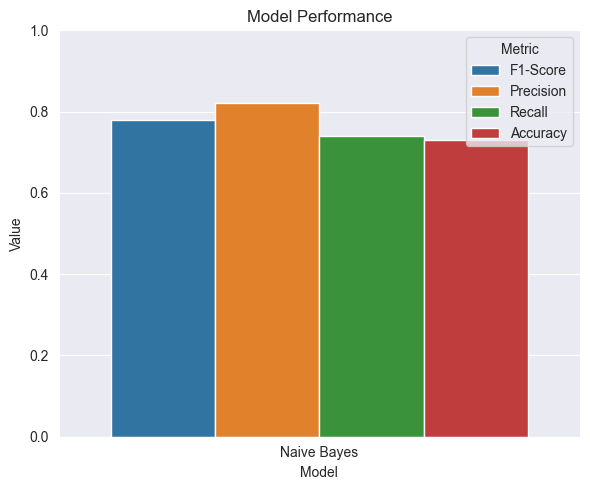

In [542]:
data = {
    'Model': [
              'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes'
              ],
    'Metric': [
               'F1-Score', 'Precision', 'Recall', 'Accuracy'
               ],
    'Value': [
               0.78, 0.82, 0.74, 0.73 
             ]  
}
df = pd.DataFrame(data)
plt.figure(figsize=(6, 5))
sns.barplot(x='Model', y='Value', hue='Metric', data=df)
plt.title('Model Performance')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()